In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
train_data = pd.read_csv('train_modified.csv') # Important!!
print(train_data.shape)
train_data.head()

/home/tintash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.



(903653, 56)


,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [3]:
#Print all the column names
print(train_data.columns.values)

['Unnamed: 0' 'channelGrouping' 'date' 'fullVisitorId' 'sessionId'
 'socialEngagementType' 'visitId' 'visitNumber' 'visitStartTime'
 'device.browser' 'device.browserSize' 'device.browserVersion'
 'device.deviceCategory' 'device.flashVersion' 'device.isMobile'
 'device.language' 'device.mobileDeviceBranding' 'device.mobileDeviceInfo'
 'device.mobileDeviceMarketingName' 'device.mobileDeviceModel'
 'device.mobileInputSelector' 'device.operatingSystem'
 'device.operatingSystemVersion' 'device.screenColors'
 'device.screenResolution' 'geoNetwork.city' 'geoNetwork.cityId'
 'geoNetwork.continent' 'geoNetwork.country' 'geoNetwork.latitude'
 'geoNetwork.longitude' 'geoNetwork.metro' 'geoNetwork.networkDomain'
 'geoNetwork.networkLocation' 'geoNetwork.region'
 'geoNetwork.subContinent' 'totals.bounces' 'totals.hits'
 'totals.newVisits' 'totals.pageviews' 'totals.transactionRevenue'
 'totals.visits' 'trafficSource.adContent'
 'trafficSource.adwordsClickInfo.adNetworkType'
 'trafficSource.adwordsC

In [4]:
#train_data = pd.DataFrame(train_data)
train_data['totals.transactionRevenue'] = train_data['totals.transactionRevenue'].fillna(0)

In [5]:
#Each transaction against visit number 1 graph distribution
transactionOfVisit1 = train_data[train_data['visitNumber'] == 1]
transactionOfVisit1 = transactionOfVisit1[transactionOfVisit1['totals.transactionRevenue'] != 0]

transactionOfVisit1 = transactionOfVisit1['totals.transactionRevenue'].sort_values(ascending=True)
freq_transaction_visit1 = transactionOfVisit1.value_counts()

In [6]:
# print(freq_visitNumber.index.sort_values(ascending=True))
freq_transaction_visit1

16990000.0     160
18990000.0     112
33590000.0      96
55990000.0      58
10990000.0      52
13590000.0      50
44790000.0      45
15190000.0      45
24990000.0      42
19990000.0      42
19190000.0      38
15990000.0      34
1990000.0       33
27190000.0      31
12990000.0      27
33980000.0      27
6990000.0       26
27180000.0      25
39990000.0      22
67180000.0      22
35980000.0      21
27980000.0      20
59990000.0      20
79990000.0      20
13290000.0      20
99990000.0      19
21990000.0      19
30390000.0      18
23990000.0      16
8990000.0       16
              ... 
179940000.0      1
333910000.0      1
14630000.0       1
156470000.0      1
118910000.0      1
119130000.0      1
215050000.0      1
455550000.0      1
137600000.0      1
145990000.0      1
125440000.0      1
84530000.0       1
78940000.0       1
13450000.0       1
166970000.0      1
5480000.0        1
43660000.0       1
32740000.0       1
110750000.0      1
36190000.0       1
48950000.0       1
133820000.0 

In [63]:
# plt.bar(freq_visitNumber.values, freq_visitNumber.index)
# plt.show()


data = [go.Bar(
            x= freq_transaction_visit1.index,
            y=freq_transaction_visit1.values
    )]

layout = go.Layout(
    title='Transaction against Visit 1',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total continent visited')

In [58]:
mean = np.mean(freq_transaction_visit1.index)
st_dev = np.std(freq_transaction_visit1.index)
maximum = np.max(freq_transaction_visit1)
minimum = np.min(freq_transaction_visit1)

print(mean, st_dev, maximum, minimum)

138468777.17391303 251421214.4270921 160 1


In [60]:
mu, sigma = mean, st_dev
s = np.random.normal(mu, sigma, 1000)

freq_transaction_visit1

16990000.0     160
18990000.0     112
33590000.0      96
55990000.0      58
10990000.0      52
13590000.0      50
44790000.0      45
15190000.0      45
24990000.0      42
19990000.0      42
19190000.0      38
15990000.0      34
1990000.0       33
27190000.0      31
12990000.0      27
33980000.0      27
6990000.0       26
27180000.0      25
39990000.0      22
67180000.0      22
35980000.0      21
27980000.0      20
59990000.0      20
79990000.0      20
13290000.0      20
99990000.0      19
21990000.0      19
30390000.0      18
23990000.0      16
8990000.0       16
              ... 
179940000.0      1
333910000.0      1
14630000.0       1
156470000.0      1
118910000.0      1
119130000.0      1
215050000.0      1
455550000.0      1
137600000.0      1
145990000.0      1
125440000.0      1
84530000.0       1
78940000.0       1
13450000.0       1
166970000.0      1
5480000.0        1
43660000.0       1
32740000.0       1
110750000.0      1
36190000.0       1
48950000.0       1
133820000.0 

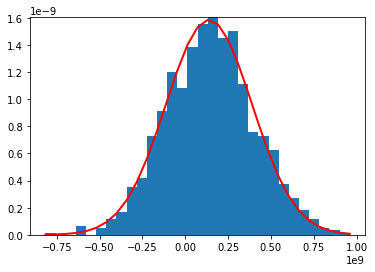

In [42]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

8832474.944530075
[-2.27207938 -1.70598664 -1.25311244 ...  5.10863784  5.99287471
  8.82333845]


(array([3.00e+00, 1.00e+01, 2.18e+03, 8.00e+00, 2.00e+00, 2.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([-2.27207938, -1.1625376 , -0.05299582,  1.05654596,  2.16608775,
         3.27562953,  4.38517131,  5.4947131 ,  6.60425488,  7.71379666,
         8.82333845]),
 <a list of 10 Patch objects>)

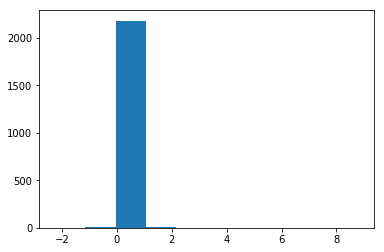

In [7]:
sum_freq = 0
diff_freq = 0
for i in (freq_transaction_visit1):
    sum_freq = sum_freq + freq_transaction_visit1.index[i]
    diff_freq = freq_transaction_visit1.index[i] - diff_freq
    
mean_transaction_visit1 = sum_freq/len(freq_transaction_visit1)

for i in (freq_transaction_visit1):
    diff_freq = diff_freq + ((freq_transaction_visit1.index[i] - mean_transaction_visit1)**2)
std_transaction_visit1 = np.sqrt(diff_freq/len(freq_transaction_visit1))
print(std_transaction_visit1)

zscore = np.zeros(len(freq_transaction_visit1))
for i in freq_transaction_visit1:
    zscore[i] = (freq_transaction_visit1.index[i] - mean_transaction_visit1)/std_transaction_visit1
    #print(zcore[i])
print(np.sort(zscore))
#plt.plot(np.sort(zscore),)


#ax1 = plt.subplot(131)

#plt.xlim([-2,2])
plt.hist(np.sort(zscore))
# print(freq_transaction_visit1.index.min(), freq_transaction_visit1.index.max())

# count, bins, ignored = plt.hist(np.sort(zscore))
# plt.plot(bins, linewidth=2, color='r')
# plt.show()
#ax1.set_xlim([-1, 1])
# calculated_mean =  / len(freq_transaction_visit1)
# calculated_mean

/home/tintash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



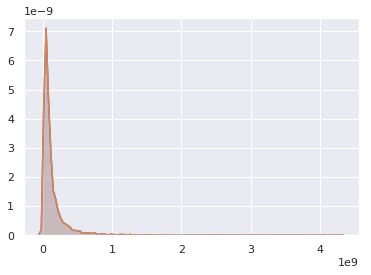

In [8]:
import seaborn as sns
sns.set()

for col in 'xy':
    sns.kdeplot(freq_transaction_visit1.index, shade=True)

/home/tintash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



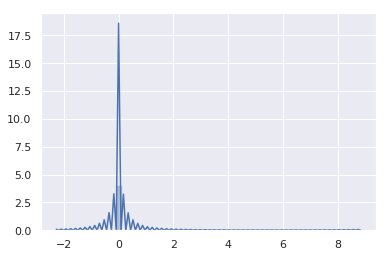

In [9]:
sns.distplot(zscore)

/home/tintash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



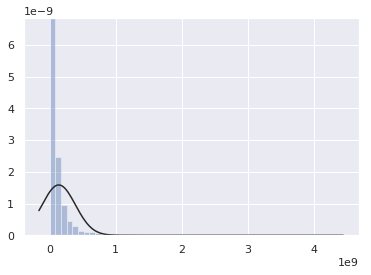

In [11]:
# for col in 'xy':
#     sns.kdeplot(train_data['visitNumber'], shade=True)

from scipy.stats import norm
sns.distplot(freq_transaction_visit1.index, fit=norm, kde=False)

# sns.distplot(zscore, fit=norm, kde=False)

/home/tintash/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



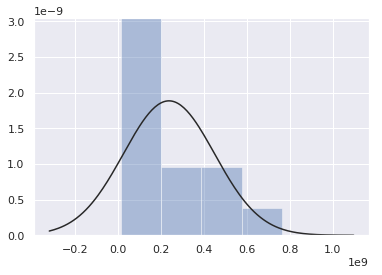

In [26]:
transactionOfVisit2 = train_data[train_data['visitNumber'] == 15]
transactionOfVisit2 = transactionOfVisit2[transactionOfVisit2['totals.transactionRevenue'] != 0]
transactionOfVisit2 = transactionOfVisit2['totals.transactionRevenue'].sort_values(ascending=True)
freq_transaction_visit2 = transactionOfVisit2.value_counts()

sns.distplot(freq_transaction_visit2.index, fit=norm, kde=False)